# 01 - Data Preprocessing

This notebook handles the data preprocessing steps, including:
- Loading the dataset
- Cleaning and handling missing values
- Feature engineering
- Encoding categorical variables

## 1. Load the Dataset

In [36]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the zipped CSV file with utf-8 encoding
df = pd.read_csv('../data/LoansData_sample.csv.gz', compression='gzip', encoding='utf-8')

# Set the first column as the index
df.set_index(df.columns[0], inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0

## 2. Data Cleaning
- Handling missing values
- Checking for duplicates
- Ensuring correct data types

### 2.1 Preparing the predicted variable

In [38]:
df['loan_status'].value_counts()

loan_status
Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: count, dtype: int64

In [39]:
# Filter the dataset to keep only the loans with status "Fully Paid" or "Charged Off"
filtered_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
# print(filtered_df)

# Count the number of each status
status_counts = filtered_df['loan_status'].value_counts()
print(status_counts)

loan_status
Fully Paid     69982
Charged Off    16156
Name: count, dtype: int64


In [40]:
# Set the labels to be 1 for "Charged Off" and 0 for "Fully Paid"
filtered_df['target'] = filtered_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
filtered_df.drop('loan_status', axis=1, inplace=True)

### 2.2 Cleaning

In [41]:
# Calculate the percentage of missing values for each column
nan_counts = filtered_df.isnull().sum()
nan_percentage = (nan_counts / filtered_df.shape[0]) * 100

# Filter columns where missing values are more than 10%
nan_percentage_filtered_10 = nan_percentage[nan_percentage >  10]
print(f"Columns with more than 10% missing values: {nan_percentage_filtered_10.count()}")

# Drop columns where missing values are more than 30%
nan_percentage_filtered_30 = nan_percentage[nan_percentage > 30]
filtered_df.drop(nan_percentage_filtered_30.index, axis=1, inplace=True)

Columns with more than 10% missing values: 58


### 2.3  Features elimination based on analysis

In [42]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths", "target"]

In [43]:
filtered_df = filtered_df[filtered_df.columns.intersection(keep_list)]

In [44]:
print(filtered_df.dtypes)


id                         int64
loan_amnt                float64
funded_amnt              float64
term                      object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
purpose                   object
title                     object
zip_code                  object
addr_state                object
dti                      float64
earliest_cr_line          object
fico_range_low           float64
fico_range_high          float64
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status       object
last_pymnt_amnt          float64
application_type          object
acc_open_past_24mths     float64
avg_cur_ba

### 2.4  Features elimination based on the correlation

In [45]:
# Remove all of the features with a correlation of under 3% with the  charge-off label
numeric_df = filtered_df.select_dtypes(include=['number'])

correlation_with_target = numeric_df.corr()['target'].sort_values(ascending=False).abs()
bad_correlation_with_target = correlation_with_target[correlation_with_target<0.03]
filtered_df.drop(bad_correlation_with_target.index, axis=1, inplace=True)

In [46]:
filtered_df.shape

(86138, 34)

## 3. Feature Engineering
- Transforming categorical variables
- Creating new relevant features
- Scaling numerical features if necessary

In [47]:
processed_df = filtered_df.copy()

### 3.1 Categorical data

In [48]:
# List categorical features
non_numeric_features = filtered_df.select_dtypes(include=['object']).columns

# Display the number of categories for each non-numeric feature
for feature in non_numeric_features:
    print(f"{feature}: {filtered_df[feature].nunique()} categories")
    
processed_df['term'] = filtered_df['term'].copy().apply(lambda row: 36 if row == ' 36 months' else 60)

term: 2 categories
grade: 7 categories
sub_grade: 35 categories
emp_title: 32987 categories
emp_length: 11 categories
home_ownership: 4 categories
verification_status: 3 categories
purpose: 13 categories
title: 20 categories
zip_code: 846 categories
addr_state: 46 categories
earliest_cr_line: 598 categories
initial_list_status: 2 categories
application_type: 1 categories


In [49]:
### sub_grade ###
# Define base values for each letter, where A is the highest and G is the lowest
letter_values = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Convert grades to a continuous numeric scale
def grade_to_continuous(grade):
    letter = grade[0]  # Extract the letter part
    number = int(grade[1])  # Extract the number part
    return letter_values[letter] * 5 - number  # Use a continuous scoring system

# Apply the function to the 'grade' column
processed_df['sub_grade'] = filtered_df['sub_grade'].copy().apply(grade_to_continuous)

# We can drop grade because we have sub_grade
processed_df.drop('grade', axis=1, inplace=True)


In [50]:
### emp_length ###
experience_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 12
}   

# Apply the function to the 'grade' column
processed_df['emp_length'] = filtered_df['emp_length'].copy().map(experience_mapping)

In [51]:
### initial_list_status ###
processed_df['initial_list_status'] = np.where(filtered_df['initial_list_status'] == 'w', 0, 1)

In [52]:
### mix ###
processed_df_test = processed_df[['purpose', 'title']]
processed_df_test['mix'] = processed_df_test.apply(lambda x: f"{x['purpose']} {x['title']}", axis=1)
# We can see some data error, so we will keep the more reliable one which is purpose because standardized data compared to title
processed_df.drop(['title'], axis=1, inplace=True)

In [53]:
### zip_code / emp_title ###
zip_code_freq = filtered_df['zip_code'].str[:3].value_counts().to_dict()
job_title_frequenct = filtered_df['emp_title'].value_counts().to_dict()

# Map each ZIP code to its frequency
processed_df['zip_code'] = filtered_df['zip_code'].copy().str[:3].map(zip_code_freq)
processed_df['emp_title'] = filtered_df['emp_title'].copy().map(job_title_frequenct)

In [54]:
### earliest_cr_line ###
filtered_df['earliest_cr_line_date'] = pd.to_datetime(filtered_df['earliest_cr_line'], format='%b-%Y')

# Find the oldest and the most recent dates in the column
min_date = filtered_df['earliest_cr_line_date'].min()
max_date = filtered_df['earliest_cr_line_date'].max()

# Calculate the numeric difference in days from the minimum date
processed_df['earliest_cr_line'] = round((filtered_df['earliest_cr_line_date'] - min_date).dt.days / 365, 1)

processed_df[['earliest_cr_line']].head()

,earliest_cr_line
Unnamed: 0,
0,39.8
1,34.9
2,48.8
4,47.8
5,38.0


In [55]:
processed_df.drop('application_type', axis=1, inplace=True)
processed_df.drop('addr_state', axis=1, inplace=True)

In [56]:
### home_ownership / verification_status / purpose ###
# One hot encoding
processed_df = pd.get_dummies(processed_df, columns=['home_ownership', 'verification_status', 'purpose'], drop_first=True)

In [57]:
# Check if all categories are handled
non_numeric_features = processed_df.select_dtypes(include=['object']).columns

# Display the number of categories for each non-numeric feature
for feature in non_numeric_features:
    print(f"{feature}: {processed_df[feature].nunique()} categories")

In [58]:
processed_df.shape

(86138, 44)

### 3.2 Continuous data

In [59]:
# Summary statistics for all numerical columns
numerical_summary = filtered_df.select_dtypes(include='number').describe()
print(numerical_summary)

          loan_amnt   funded_amnt      int_rate   installment    annual_inc  \
count  86138.000000  86138.000000  86138.000000  86138.000000  8.613800e+04   
mean   14106.526446  14106.526446     13.002360    430.737187  7.384311e+04   
std     8391.139221   8391.139221      4.397419    251.653139  5.929352e+04   
min     1000.000000   1000.000000      6.000000     30.420000  4.000000e+03   
25%     7800.000000   7800.000000      9.490000    248.480000  4.500000e+04   
50%    12000.000000  12000.000000     12.990000    370.480000  6.247372e+04   
75%    20000.000000  20000.000000     15.610000    568.005000  9.000000e+04   
max    35000.000000  35000.000000     26.060000   1408.130000  7.500000e+06   

                dti  fico_range_low  fico_range_high      open_acc  \
count  86138.000000    86138.000000     86138.000000  86138.000000   
mean      18.532747      692.462966       696.463024     11.746453   
std        8.538247       29.731549        29.731848      5.433122   
min     

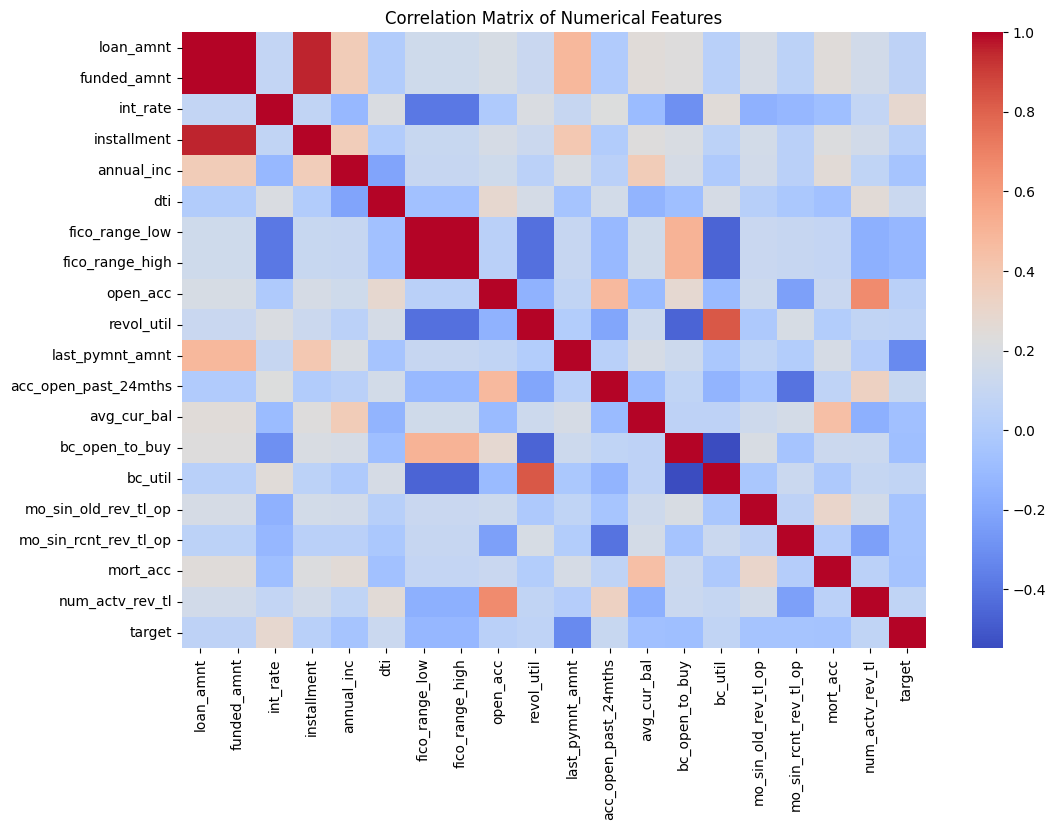

In [60]:
# Look at correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and display the correlation matrix
correlation_matrix = filtered_df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [61]:
### annual_inc ### Scaling
processed_df['annual_inc'] = filtered_df['annual_inc'].copy()/1000

In [62]:
### fico_spread ### Create new feature
processed_df['fico_spread'] = filtered_df['fico_range_low'].copy() - filtered_df['fico_range_high'].copy()
processed_df.drop(['fico_range_high'], axis=1, inplace=True)

### 3.3 Filling NaN

In [63]:
nan_counts = processed_df.isna().sum()
print(nan_counts[nan_counts > 0])

emp_title         4722
emp_length        4717
revol_util          44
bc_open_to_buy     996
bc_util           1049
dtype: int64


In [64]:
# Fill NaN in numerical columns with median
columns_to_fill_median = [
    'annual_inc', 
    'dti', 
    'fico_range_low', 
    'bc_open_to_buy',
    'emp_length',
    'emp_title',
    'bc_util',     
    'revol_util',      
    ]

# Loop through each column and fill NaN values with the median
for col in columns_to_fill_median:
    processed_df[col].fillna(processed_df[col].median(), inplace=True)

# Fill NaN in time-based columns
processed_df['earliest_cr_line'].fillna(method='ffill', inplace=True)
nan_counts = processed_df.isna().sum()

In [66]:
# Save the processed_df DataFrame to the 'data' folder in Parquet format
processed_df.to_parquet('../data/processed_df.parquet', index=False, compression="snappy")